In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


data = load_iris()


X = data['data']
y = data['target']


scaler = StandardScaler()
X = scaler.fit_transform(X)

y = pd.get_dummies(y).astype(int).values

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x = X, y = y, epochs = 50, batch_size = 10, validation_split = .2, verbose = 1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3675 - loss: 1.2153 - val_accuracy: 0.0000e+00 - val_loss: 1.4323
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4464 - loss: 1.1233 - val_accuracy: 0.0000e+00 - val_loss: 1.4060
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5584 - loss: 1.0408 - val_accuracy: 0.0000e+00 - val_loss: 1.3622
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6175 - loss: 0.9306 - val_accuracy: 0.0000e+00 - val_loss: 1.3390
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6085 - loss: 0.8508 - val_accuracy: 0.0000e+00 - val_loss: 1.2902
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6938 - loss: 0.8455 - val_accuracy: 0.0000e+00 - val_loss: 1.2285
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6652 - loss: 0.8358 - val_accuracy: 0.0000e+00 - val_loss: 1.1732
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.8136 - val

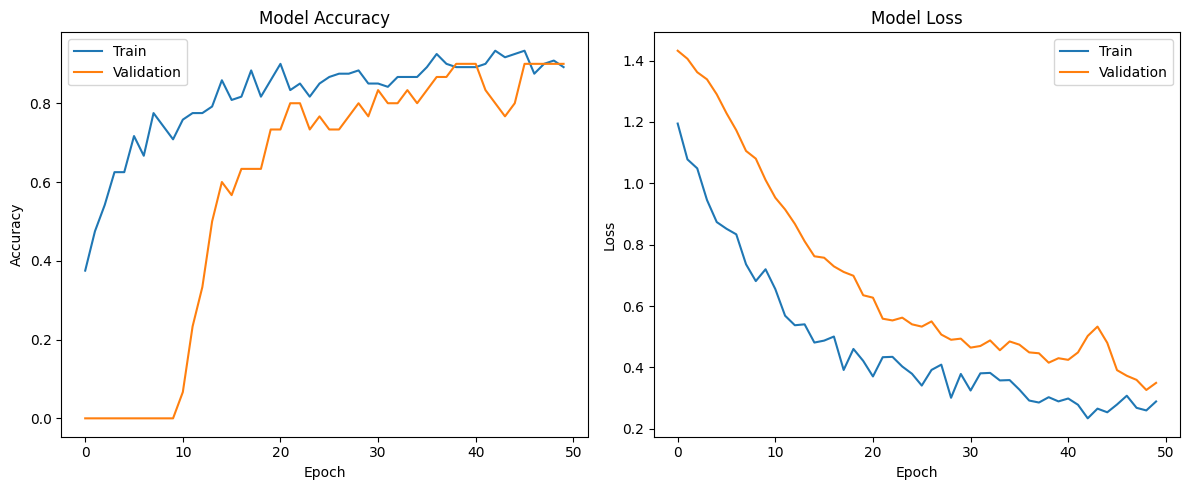

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

# loss subplot
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.tight_layout()
plt.show()


In [ ]:
model.save('model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [ ]:
res = model.predict(np.expand_dims(X[76], axis=0))

if np.argmax(res) == 0:
  print('setosa')

elif np.argmax(res) == 1:
  print('versicolor')

else:
  print('verginica')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
versicolor


In [ ]:
X[76]

array([ 1.15917263, -0.59237301,  0.59224599,  0.26414192])

In [ ]:
np.expand_dims(X[76], axis=0)

array([[ 1.15917263, -0.59237301,  0.59224599,  0.26414192]])

In [ ]:
from tensorflow.keras.datasets import mnist

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
